# Merging DataFrames

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanup data
df['job_posted_data'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_IND = df[df['job_country'] == "India"].copy()

In [3]:
df_IND['job_posted_date'].dtype
df_IND['job_posted_date'] = pd.to_datetime(df_IND['job_posted_date'], errors='coerce')


In [5]:
df_IND['job_posted_month'] = df_IND['job_posted_date'].dt.strftime('%B')
df_IND.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_data,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",2023-06-15 13:28:03,June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-04-26 13:20:12,April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,2023-03-26 13:16:20,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",2023-07-23 13:24:57,July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",2023-11-10 13:30:41,November


In [7]:
df_IND_table = df_IND.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_IND_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [ ]:
# DONT RUN RESET ONCE ALREADY RUN, WIL CAUSE ERROR
# df_IND_table.reset_index(inplace=True)
df_IND_table['month_no'] = pd.to_datetime(df_IND_table['job_posted_month'], format='%B').dt.month

df_IND_table['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [11]:
# df_IND_table.sort_values('month_no', inplace=True)
# df_IND_table.set_index('job_posted_month', inplace=True)

# month_no no more needed so drop it

# df_IND_table.drop(columns='month_no', inplace=True)
df_IND_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [13]:
# finding out the top 3 job titles

top_3 = df_IND['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

In [14]:
df_IND_table[top_3]

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_posted_month,,,
January,2132,1444,628
February,1631,932,433
March,1591,1005,422
April,1566,946,418
May,1384,837,278
June,1632,1129,367
July,1528,1123,457
August,1407,1157,618
September,1508,984,630


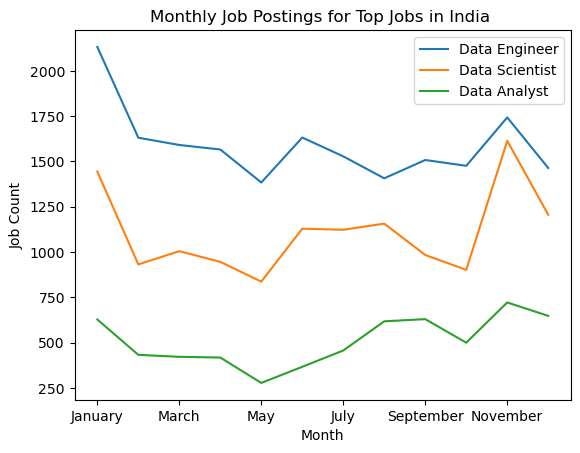

In [15]:
df_IND_table[top_3].plot(kind='line')
plt.title("Monthly Job Postings for Top Jobs in India ")
plt.xlabel("Month")
plt.ylabel("Job Count")
plt.legend()
plt.show()

In [18]:
# import the other dataset

df_ind_sw = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_ind_sw

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [20]:
# merge the 2 DF's

df_IND_merged = df_IND_table.merge(df_ind_sw, on='job_posted_month')

df_IND_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094


In [33]:
# find out the top 5 jobs from the merged DF

top_5 = (
    df_IND_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

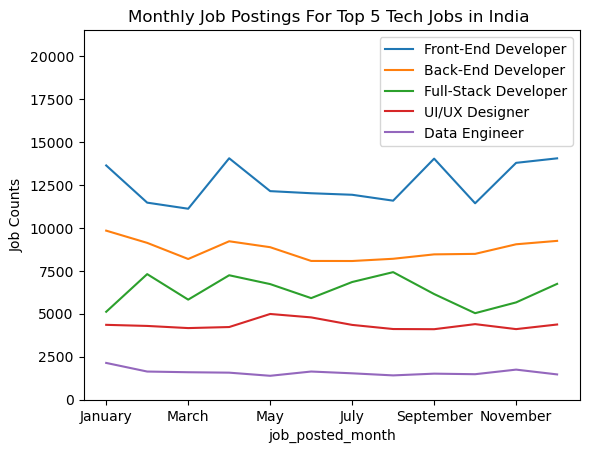

In [48]:
df_IND_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings For Top 5 Tech Jobs in India ')
plt.ylabel('Job Counts')
plt.ylim(0,21500)
plt.legend()
plt.show()

